<a href="https://colab.research.google.com/github/AlexeyUdod/dvp/blob/master/dvp_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Потренируем навыки, полученные на практическом занятии. 
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. 
Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data =  pd.read_csv(load_boston()['filename'], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()['DESCR'])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.



In [0]:
from sklearn.datasets import load_boston 
import pandas as pd 
data = pd.read_csv(load_boston()['filename'], skiprows=1) 

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [0]:
        # - CRIM     per capita crime rate by town
        # - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        # - INDUS    proportion of non-retail business acres per town
        # - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        # - NOX      nitric oxides concentration (parts per 10 million)
        # - RM       average number of rooms per dwelling
        # - AGE      proportion of owner-occupied units built prior to 1940
        # - DIS      weighted distances to five Boston employment centres
        # - RAD      index of accessibility to radial highways
        # - TAX      full-value property-tax rate per $10,000
        # - PTRATIO  pupil-teacher ratio by town
        # - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        # - LSTAT    % lower status of the population
        # - MEDV     Median value of owner-occupied homes in $1000's

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
import sklearn
names = [x for x in data]
data_norm = pd.DataFrame(sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(data), columns=data.columns)
data_norm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.998734,-1.00,-0.159091,-1.0,-0.226337,0.161908,0.363543,-0.754658,-1.000000,-0.671756,0.787234,0.975238,-0.561810,-0.226667
502,-0.999124,-1.00,-0.159091,-1.0,-0.226337,-0.019352,0.520082,-0.789413,-1.000000,-0.671756,0.787234,1.000000,-0.594371,-0.306667
503,-0.998776,-1.00,-0.159091,-1.0,-0.226337,0.308680,0.814624,-0.811238,-1.000000,-0.671756,0.787234,1.000000,-0.784216,-0.160000
504,-0.997679,-1.00,-0.159091,-1.0,-0.226337,0.238935,0.779609,-0.770972,-1.000000,-0.671756,0.787234,0.982601,-0.737859,-0.244444


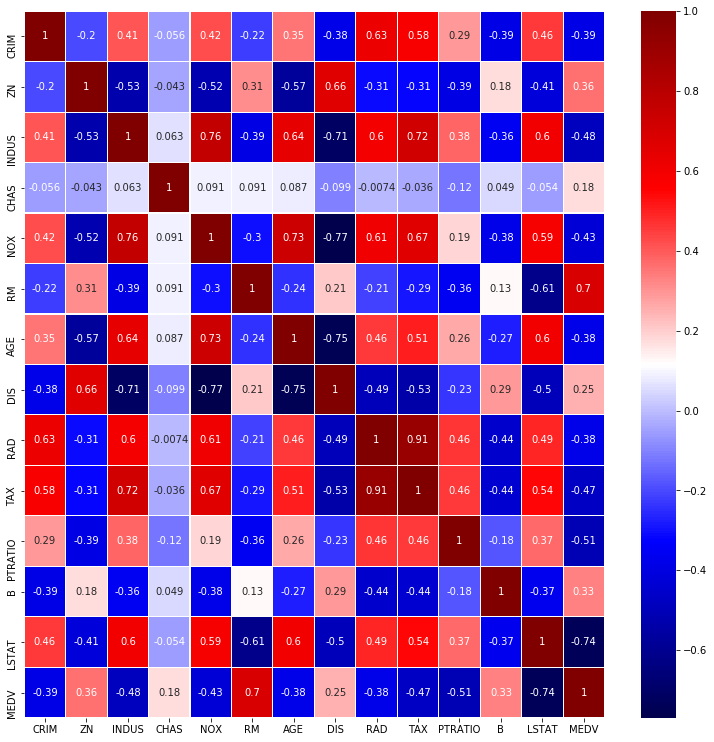

In [7]:
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(data_norm.corr(), cmap='seismic',annot=True,linewidths=0.1)


Как известно, чтобы найти MEDV, нужно думать как MEDV и наш командир отряда линейных моделей товарищ Спирманов говорит, что наилучшие шансы будут у красногвардейцев LSTAT и RM. Не будем делать преждевременные выводы и проверим это самостоятельно!

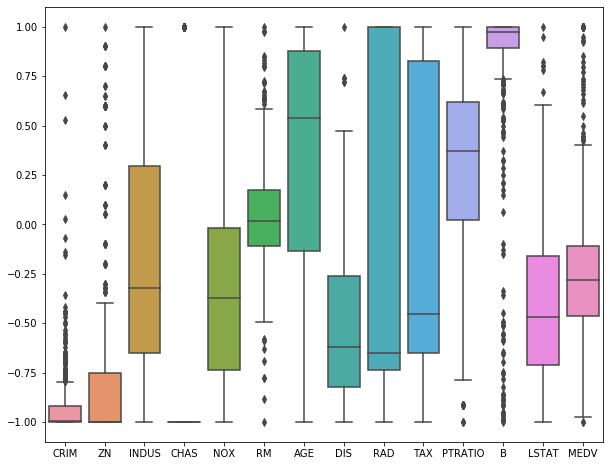

In [29]:
sns.boxplot(data=data_norm)
plt.gcf().set_size_inches(10,8)

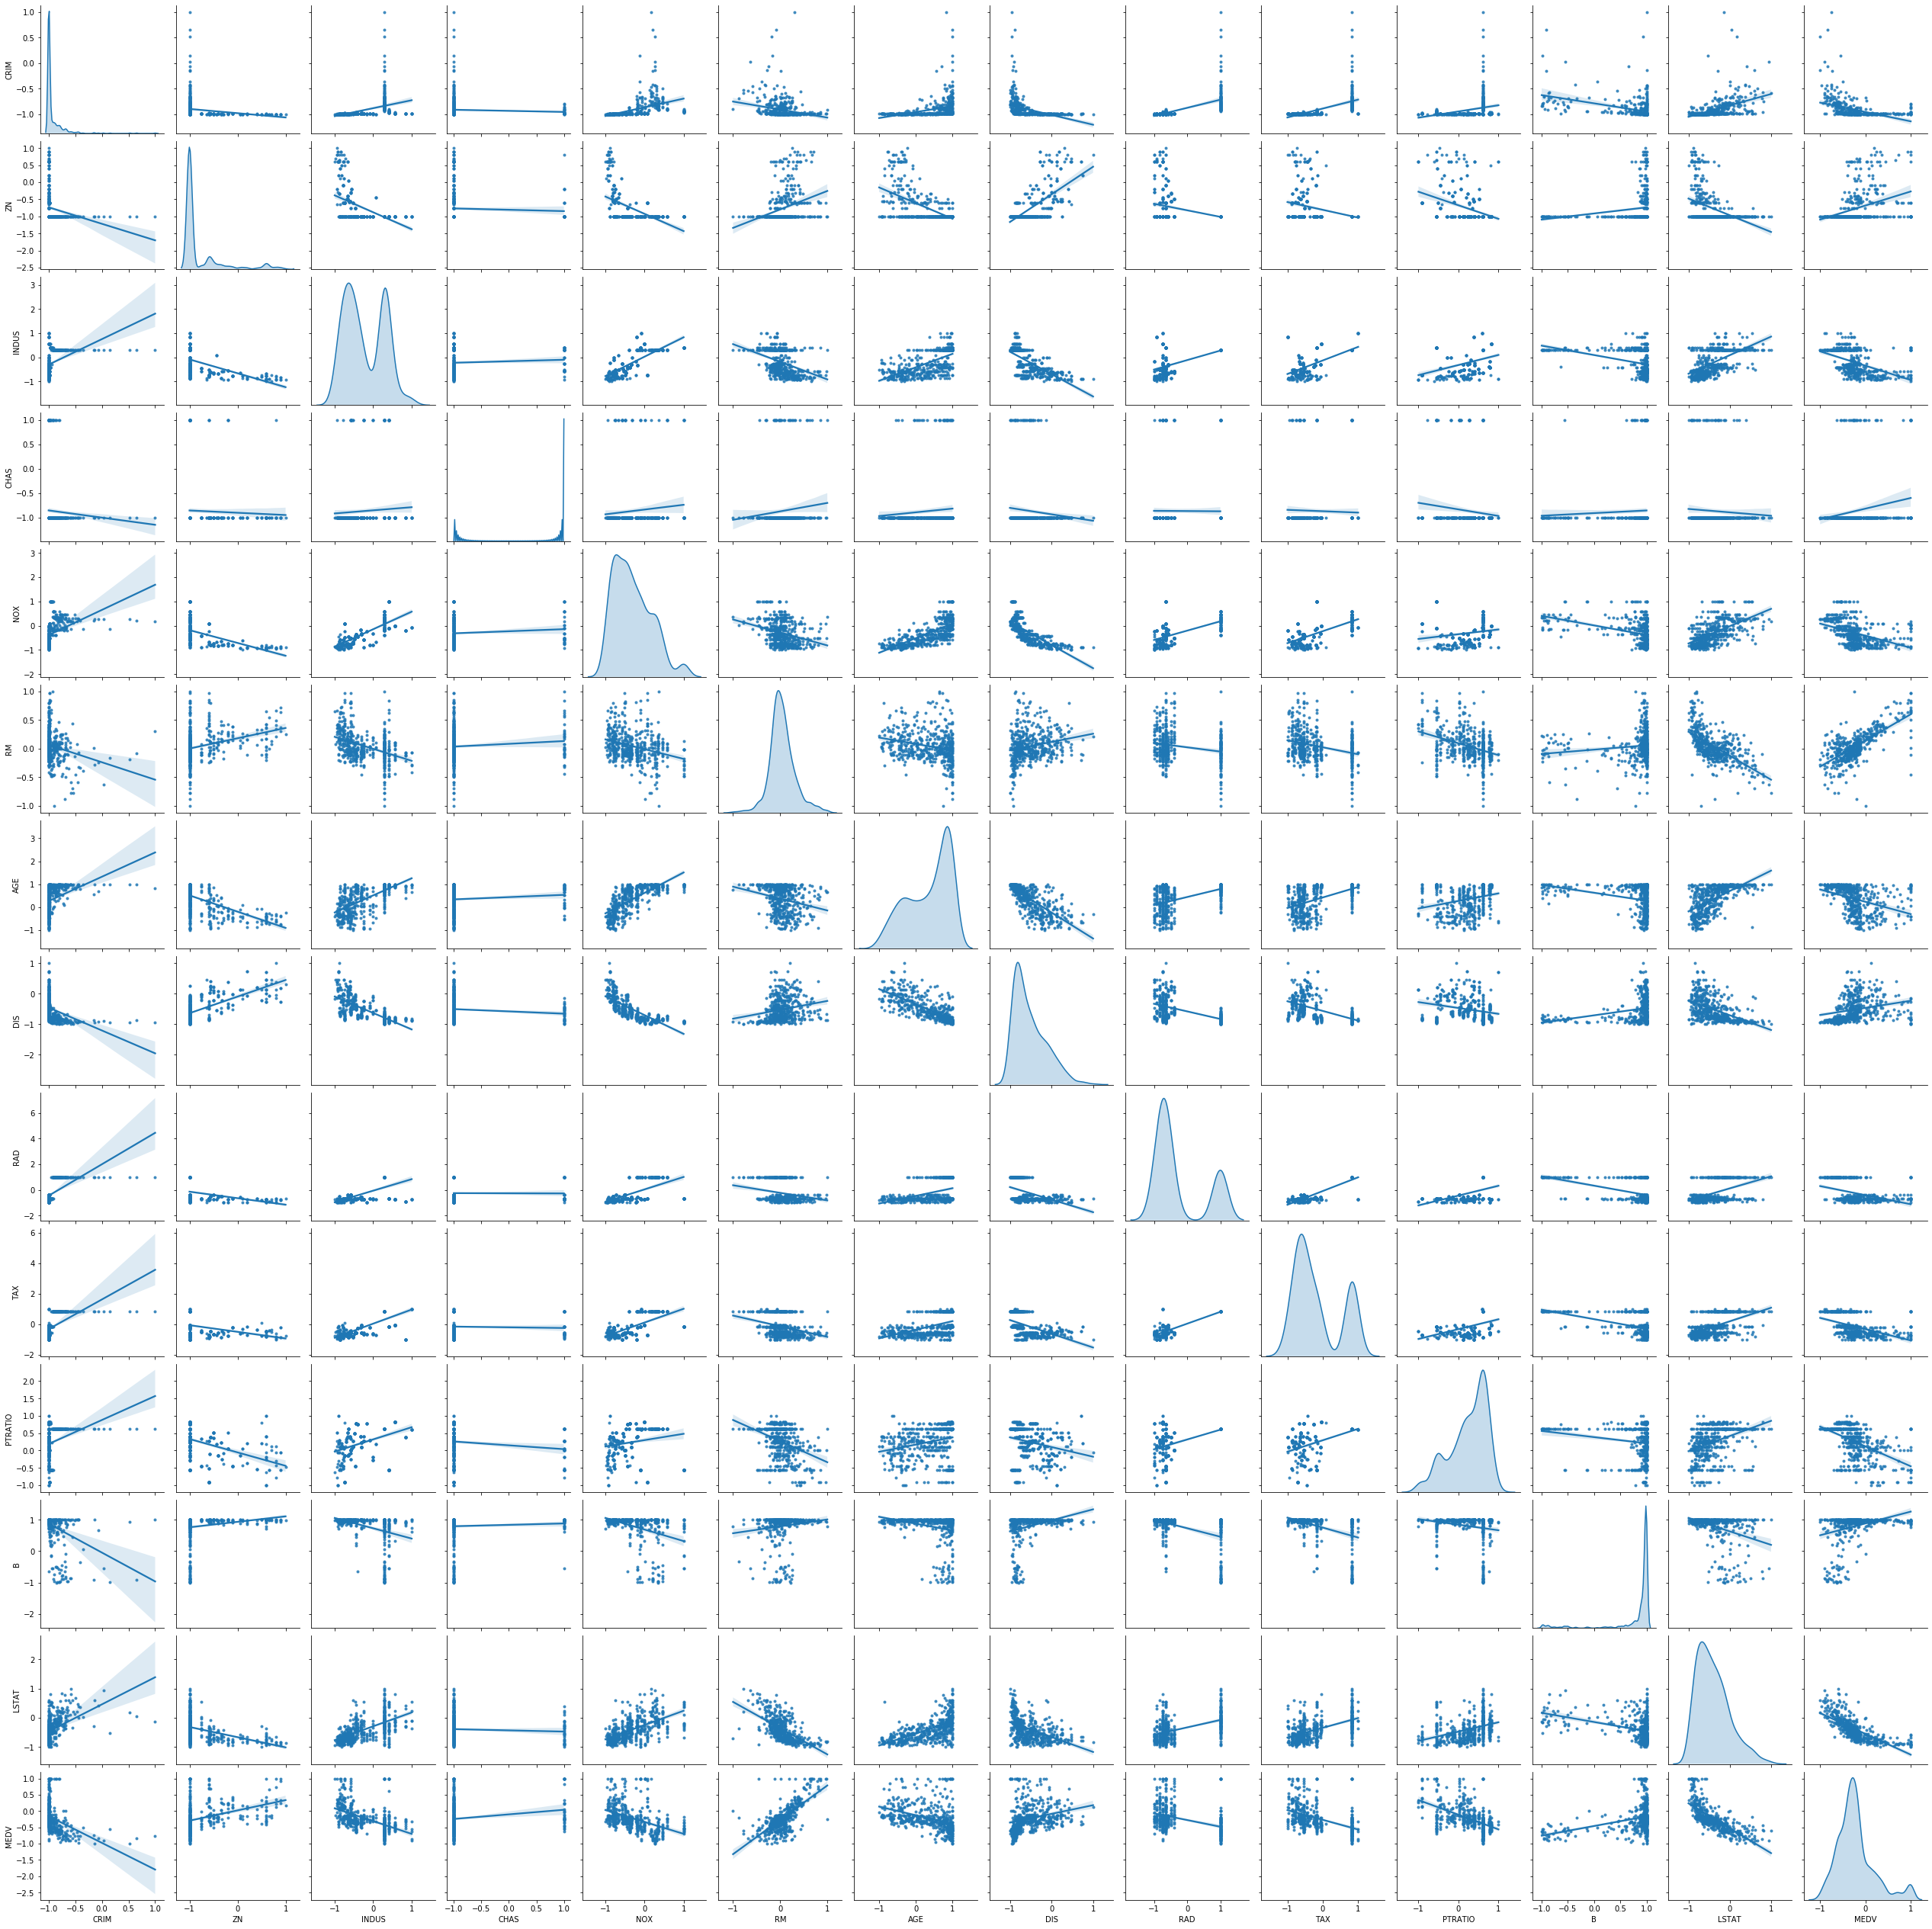

In [10]:
sns.pairplot(data_norm, kind='reg', diag_kind='kde', markers='.')#, hue=data_norm.CHAS, palette = 'RdYlGn') #

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1169: Runtim

IndexError: ignored

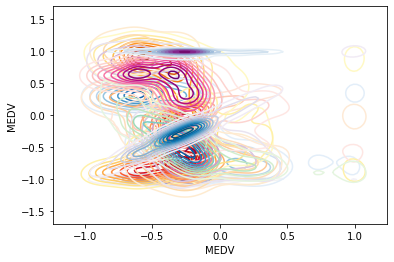

In [11]:
cmaps = [   'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
data1 = data_norm
for i in range(len(data1)):
  sns.kdeplot(data1.MEDV, data1[data.columns[i]], cmap=cmaps[i], shade_lowest=False, label=data.columns[i])
plt.figure(figsize=(10,10),legend=True)



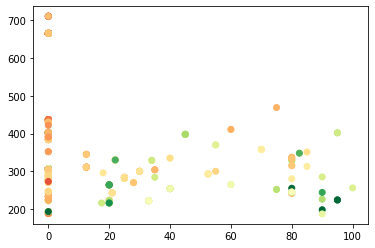

In [12]:
plt.scatter(data.ZN, data.TAX, c=data.MEDV, cmap="RdYlGn")

# 

In [0]:
def viz_c_cat(data, x, y, c):
    columns = [x for x in data]
    print(columns)
    xl = columns[x]
    yl = columns[y]
    cl = columns[c]
    x = data[xl]
    y = data[yl]
    c = data[cl]
    plt.xlabel(xl)
    plt.ylabel(yl)
    c_set = c.unique()
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for i in range(len(c_set)):
        plt.scatter(x[c == c_set[i]], y[c == c_set[i]], color = colors[i], marker = '.', label = c_set[i])
    plt.gcf().set_size_inches(12,10)
    plt.legend(title = cl)
    return

def viz_c_float(data, x, y, c):
    columns = [x for x in data]
    print(columns)
    xl = columns[x]
    yl = columns[y]
    cl = columns[c]
    x = data[xl]
    y = data[yl]
    c = data[cl]
    plt.xlabel(xl)
    plt.ylabel(yl)
    # c_set = c.unique()
    # colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    # for i in range(len(c_set)):
    plt.scatter(x, y, c = c, cmap="RdYlGn", marker = 'o')
    plt.gcf().set_size_inches(10,8)
    plt.legend(title = cl)
    return



def dist1(data, y, c):
    columns = [x for x in data]
    print(columns)
#     xl = columns[x]
    yl = columns[y]
    cl = columns[c]
#     x = data[xl]
    y = data[yl]
    c = data[cl]
    plt.xlabel(yl)
    plt.ylabel('quantity of ' + yl)
    c_set = c.unique()
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for i in range(len(c_set)):
        plt.hist(y[c == c_set[i]], 
                 color = colors[i],
                 label = c_set[i],
                 histtype = 'stepfilled', 
                 alpha = 0.3,
                 bins = 100)
    plt.gcf().set_size_inches(12,10)
    plt.legend(title = cl)
    return

No handles with labels found to put in legend.


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


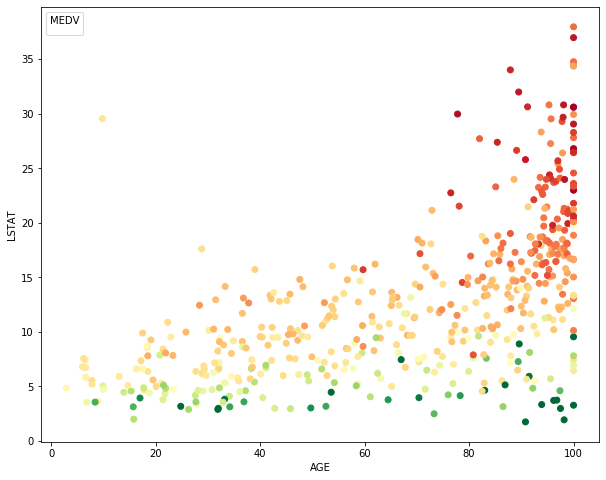

In [38]:
viz_c_float(data, 6,12,13)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

линейная модель по CRIM (отбрасываем 0.0% мин. и макс. значений) имеет точность 14.58%
линейная модель по CRIM (отбрасываем 2.0% мин. и макс. значений) имеет точность 13.79%
линейная модель по CRIM (отбрасываем 4.0% мин. и макс. значений) имеет точность 21.19%
линейная модель по CRIM (отбрасываем 6.0% мин. и макс. значений) имеет точность 18.18%
линейная модель по CRIM (отбрасываем 8.0% мин. и макс. значений) имеет точность 12.46%
линейная модель по CRIM (отбрасываем 10.0% мин. и макс. значений) имеет точность 17.24%
линейная модель по CRIM (отбрасываем 12.0% мин. и макс. значений) имеет точность 8.61%
линейная модель по CRIM (отбрасываем 14.0% мин. и макс. значений) имеет точность 19.61%
линейная модель по CRIM (отбрасываем 16.0% мин. и макс. значений) имеет точность 14.64%
линейная модель по CRIM (отбрасываем 18.0% мин. и макс. значений) имеет точность 5.62%
линейная модель по CRIM (отбрасываем 20.0% мин. и макс. значений) имеет точность 12.97%
линейная модель по CRIM (отбрасываем 22

MEDV     100.00
RM        60.23
LSTAT     55.89
INDUS     38.75
TAX       30.86
dtype: float64

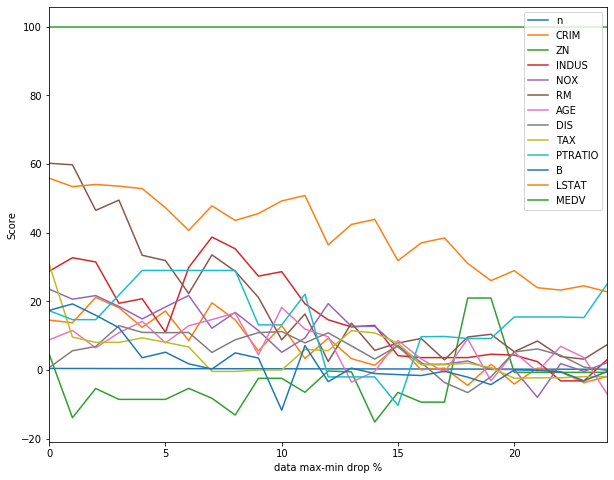

In [41]:
# cmaps = [   'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

data1 = data_norm
model = LinearRegression()
ns = [x/100 for x in range(50,25,-1)]

test_result = {'n':ns}
for i in data1:
  test_list = []
  
  if len(data[i].unique()) < 10:
    continue
  for n in ns:
      x_train, x_test, y_train, y_test = train_test_split(
          np.array(data1[(data1[i] > data1[i].quantile(0.5 - n))&(data1[i] < data1[i].quantile(0.5 + n))][i]).reshape(-1,1),
          np.array(data1[(data1[i] > data1[i].quantile(0.5 - n))&(data1[i] < data1[i].quantile(0.5 + n))].MEDV).reshape(-1,1), 
          test_size=0.3,
          random_state=1)
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
      result = round(model.score(x_test, y_test) * 100, 2)
      drop_per = round((0.5-n)*200,2)
      test_list.append(result)
      print(f'линейная модель по {i} (отбрасываем {drop_per}% мин. и макс. значений) имеет точность {result}%')
  test_result[i] = test_list
  print('\n')
test_results = pd.DataFrame(test_result)
test_results.plot()
plt.xlabel('data max-min drop %')
plt.ylabel('Score')
plt.gcf().set_size_inches(10,8)
test_results.max().sort_values(ascending=False).head(5)

In [42]:
test_results.max()

n            0.50
CRIM        21.19
ZN          21.00
INDUS       38.75
NOX         23.59
RM          60.23
AGE         18.26
DIS         12.94
TAX         30.86
PTRATIO     29.03
B           19.29
LSTAT       55.89
MEDV       100.00
dtype: float64

Видно что как опытный комбриг т.Спирманов и впрям не ошибся. Лучшие результаты как по строевым смотрам в pairplot и scatter, так и по результам линейных учений на полигоне sklearn, занимают красногвардейцы RM и LSTAT, поразившие цель MEDV в  60.23% и 55.89% случаях соответственно! Бурные продолжительные апплодисменты, товарищи!!